# **Jacob Shearer - Excercise Set 2**

In [12]:
import numpy as np
import scipy as sp
import time
import scipy.optimize
import matplotlib.pyplot as plt

**Question  1:**

In [2]:
# Part (a):
def o2_forward_diff(x, h):
    analytic_original = x * np.e**x
    analytic_2nd_derivative = (x + 2) * np.e**x
    
    approx_2nd_derivative = (((x + 2*h) * np.e**(x + 2*h)) - 2*((x + h) * np.e**(x + h)) + (x * np.e**x))/h**2
    
    error = np.abs(analytic_2nd_derivative - approx_2nd_derivative)
    return approx_2nd_derivative, error

def o2_central_diff(x, h):
    analytic_original = x * np.e**x
    analytic_2nd_derivative = (x + 2) * np.e**x
    
    approx_2nd_derivative = (((x + h) * np.e**(x + h)) + ((x - h) * np.e**(x - h)) - (2*(x * np.e**x)))/h**2
    
    error = np.abs(analytic_2nd_derivative - approx_2nd_derivative)
    return approx_2nd_derivative, error

In [3]:
print('Part (a):')
print('\n')

x = 2.0
h_values = [0.5, 0.45, 0.05]
forward_diff_errors = np.array([])
central_diff_errors = np.array([])

print('For the forward difference algorithm:')
for h in h_values:
    derivative, error = o2_forward_diff(x, h)
    print(f'     h = {h}: 2nd derivative = {derivative}')
    forward_diff_errors = np.append(forward_diff_errors, error)

print('\n')

print('For the central difference algorithm:')
for h in h_values:
    derivative, error = o2_central_diff(x, h)
    print(f'     h = {h}: 2nd derivative = {derivative}')
    central_diff_errors = np.append(central_diff_errors, error)

Part (a):


For the forward difference algorithm:
     h = 0.5: 2nd derivative = 56.48901265562777
     h = 0.45: 2nd derivative = 52.840665901489125
     h = 0.05: 2nd derivative = 31.46979135824423


For the central difference algorithm:
     h = 0.5: 2nd derivative = 30.490176446172697
     h = 0.45: 2nd derivative = 30.311130120446194
     h = 0.05: 2nd derivative = 29.56546174215901


Part (b):


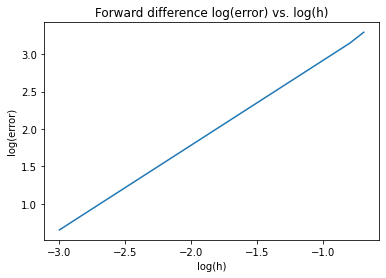

Slope of the plot from fit: 1.1433715579135624
This slope indicates that the forward difference error is proportional to h to the power of one, as expected.


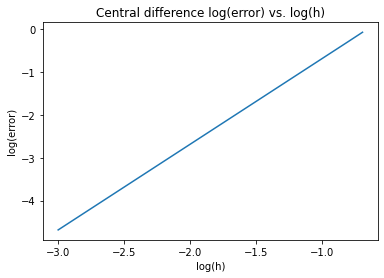

Slope of the plot from fit: 2.004445677571337
This slope indicates that the central difference error is proportional to h to the power of two, as expected.


In [4]:
# Part (b)
print('Part (b):')

fit_function = lambda x, a, b: a*x + b

# Forward difference plot
plt.plot(np.log(h_values), np.log(forward_diff_errors))
plt.title('Forward difference log(error) vs. log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

fd_params, fd_pcov = sp.optimize.curve_fit(fit_function, np.log(h_values), np.log(forward_diff_errors))
print(f'Slope of the plot from fit: {fd_params[0]}')
print('This slope indicates that the forward difference error is proportional to h to the power of one, as expected.')

# Central difference plot
plt.plot(np.log(h_values), np.log(central_diff_errors))
plt.title('Central difference log(error) vs. log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

cd_params, cd_pcov = sp.optimize.curve_fit(fit_function, np.log(h_values), np.log(central_diff_errors))
print(f'Slope of the plot from fit: {cd_params[0]}')
print('This slope indicates that the central difference error is proportional to h to the power of two, as expected.')

The error of each derivative, $\epsilon$, is related to the step size, $h$, by a power law, or:
    $$ \epsilon = kh^n$$
<br/>
Where $k$ is an arbitrary constant and $n$ is the power law exponent that relates $\epsilon$ and $h$. When we calculate the slopes of these plots, we are essentially just computing the following expression:
    $$ slope = \frac{log(\epsilon_2) - log(\epsilon_1)}{log(h_2) - log(h_1)} = \frac{log(kh_2^n) - log(kh_1^n)}{log(h_2) - log(h_1)}$$
<br/>
Logarithms have the following properties:
    $$ log(x^n) = n \cdot log(x) $$
<br/>
    $$ log(a) - log(b) = log(a/b)$$
<br/>
Applying these properties to the expression, 
    $$ slope = \frac{n(log(kh_2) - log(kh_1))}{log(h_2) - log(h_1)}$$
<br/>
    $$ = \frac{nlog(\frac{h_2}{h_1})}{log(\frac{h_2}{h_1})} $$
<br/>
    $$ = n$$
<br/>
Therefore, the slope of a log-log plot is just equal to the power law exponent. 

**Question 2:**

In [5]:
# Part (a):
def pmt_signal(time, stepsize, amplitude):
    times = np.arange(1, time, stepsize)
    # times = np.arange(1, time + stepsize, stepsize) for times[-1] = time, but this is an odd number of points
    function = lambda A, t: A * np.e**((-1/2) * (np.log(t/7)/0.45)**2)
    signal = function(amplitude, times)
    return times, signal

Part (a):


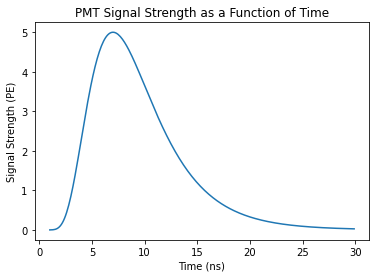

In [6]:
print('Part (a):')
times, signal = pmt_signal(30, 0.1, 5)
plt.plot(times, signal)
plt.title('PMT Signal Strength as a Function of Time')
plt.xlabel('Time (ns)')
plt.ylabel('Signal Strength (PE)')
plt.show()

In [7]:
# Part (b):
def trap_integration(x, y):
    assert len(x) == len(y), 'x and y arrays not the same shape.'
    h = (x[-1] - x[0])/(len(x) - 1)
    sum = 0.0
    for i in range(len(x)):
        weight = h/2 if x[i] == x[0] or x[i] == x[-1] else h
        sum += y[i] * weight
    
    return sum

In [8]:
print('Part (b):')
my_integration = trap_integration(times, signal)
print(f'The result of my trapezoidal integration algorithm is {my_integration}')

numpy_integration = np.trapz(signal, times)
print(f"The result of numpy's trapezoidal integration algorithm is {numpy_integration}")

print(f"The difference between these results is only {np.abs(my_integration-numpy_integration)}, so they're pretty close.")

Part (b):
The result of my trapezoidal integration algorithm is 43.566001566827104
The result of numpy's trapezoidal integration algorithm is 43.56600156682708
The difference between these results is only 2.1316282072803006e-14, so they're pretty close.


In [9]:
# Part (c):
def simp_integration(x, y):
    assert len(x) == len(y), 'x and y arrays are not the same shape'
    if len(x) % 2 == 0:
        raise Exception("The number of points (lengths of x and y) must be odd!")
    
    h = (x[-1] - x[0])/(len(x) - 1)
    sum = 0.0
    for i in range(len(x)):
        if x[i] == x[0] or x[i] == x[-1]:
            weight = h/3
        elif i % 2 == 0:
            weight = (2*h)/3
        else:
            weight = (4*h)/3
            
        sum += y[i] * weight
        
    return sum

In [10]:
print('Part (c):')
try:
    integration = simp_integration(times, signal)
except Exception as ex:
    print(ex)

integration = simp_integration(times[0:-1], signal[0:-1])
print (f'The result of my simpson integration algorithm is {integration}')

Part (c):
The number of points (lengths of x and y) must be odd!
The result of my simpson integration algorithm is 43.56323355835881


In [33]:
# Part (d):
print('Part (d):')
cp = cProfile.Profile()
cp.enable()
one = trap_integration(times, signal)
two = trap_integration(times, signal)
three = trap_integration(times, signal)
four = trap_integration(times, signal)
five = trap_integration(times, signal)
six = trap_integration(times, signal)
seven = trap_integration(times, signal)
eight = trap_integration(times, signal)
nine = trap_integration(times, signal)
ten = trap_integration(times, signal)
cp.disable()
cp.print_stats()

k10_signals = 0.002 * 1000
print (f'''According to this measurement, it would take {k10_signals} seconds to integrate 10,000 signals with the 
trapezoidal algorithm.''')

# cProfile was measuring the time to run the algorithm as less than 1/1000th of a second, so it was just printing the
# total time as 0.000 seconds.
# To get around this I just had it measure the time to run the algorithm 10 times and then multiplied the result by 1000.

Part (d):
         293 function calls in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    0.002    0.000    0.002    0.000 3201132740.py:2(trap_integration)
        1    0.000    0.000    0.000    0.000 3672226663.py:10(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:11(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:12(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:13(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:14(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:15(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:5(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:6(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:7(<module>)
        1    0.000    0.000    0.000    0.000 3672226663.py:8(<module>)
        1    0.000    0.000    0.000

**Question 3:**